# Project 4 – Predicting Fare with Regression (Titanic)

**Name:** Brandon  
**Date:** 2025-11-14  

**Objective:**  
Use the Titanic dataset to predict the continuous variable **fare** using regression models  
(Linear Regression, Ridge, Elastic Net, Polynomial Regression). We'll compare models and  
analyze which features help us predict fare best.


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rcParams["figure.figsize"] = (8, 5)


In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:

titanic['age'].fillna(titanic['age'].median(), inplace=True)


titanic = titanic.dropna(subset=['fare'])


titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})


titanic[['age', 'fare', 'family_size', 'sex', 'embarked']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          891 non-null    float64
 1   fare         891 non-null    float64
 2   family_size  891 non-null    int64  
 3   sex          891 non-null    int64  
 4   embarked     889 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.9 KB


/var/folders/m9/1kql7c111p54z_n1p1bw9znr0000gn/T/ipykernel_16508/952068038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [5]:
X1 = titanic[['age']]
y1 = titanic['fare']

X2 = titanic[['family_size']]
y2 = titanic['fare']

X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

X4 = titanic[['pclass', 'sex', 'age']]
y4 = titanic['fare']


In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)


In [8]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def report_case(name, y_train, y_train_pred, y_test, y_test_pred):
    print(name)
    print("  Train R²:", r2_score(y_train, y_train_pred))
    print("  Test  R²:", r2_score(y_test, y_test_pred))
    print("  Test RMSE:", rmse(y_test, y_test_pred))
    print("  Test MAE:", mean_absolute_error(y_test, y_test_pred))
    print()

report_case("Case 1: age", y1_train, y1_pred_train, y1_test, y1_pred_test)
report_case("Case 2: family_size", y2_train, y2_pred_train, y2_test, y2_pred_test)
report_case("Case 3: age + family_size", y3_train, y3_pred_train, y3_test, y3_pred_test)
report_case("Case 4: pclass + sex + age", y4_train, y4_pred_train, y4_test, y4_pred_test)


Case 1: age
  Train R²: 0.009950688019452203
  Test  R²: 0.0034163395508415295
  Test RMSE: 37.97164180172938
  Test MAE: 25.28637293162364

Case 2: family_size
  Train R²: 0.049915792364760736
  Test  R²: 0.022231186110131973
  Test RMSE: 37.6114940041967
  Test MAE: 25.025348159416414

Case 3: age + family_size
  Train R²: 0.07347466201590014
  Test  R²: 0.049784832763073106
  Test RMSE: 37.0777586646559
  Test MAE: 24.284935030470688

Case 4: pclass + sex + age
  Train R²: 0.3151329425803896
  Test  R²: 0.3502526863623703
  Test RMSE: 30.66018284544516
  Test MAE: 20.477296718289782



Linear
  R²: 0.0034163395508415295
  RMSE: 37.97164180172938
  MAE: 25.28637293162364

Ridge
  R²: 0.00341649979401748
  RMSE: 37.9716387489517
  MAE: 25.286366539399406

ElasticNet
  R²: 0.0034751035911166905
  RMSE: 37.97052227706171
  MAE: 25.284019721480387

Polynomial d=3
  R²: -0.0033041302146110674
  RMSE: 38.09945771469931
  MAE: 25.30387244573219



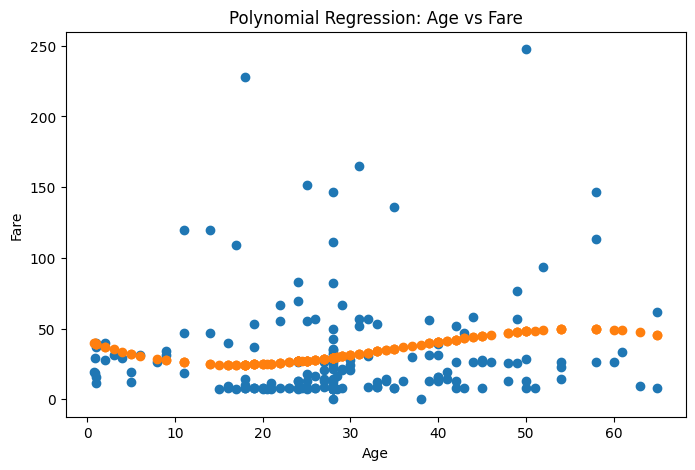

In [9]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)
y_pred_ridge = ridge_model.predict(X1_test)

elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)
y_pred_elastic = elastic_model.predict(X1_test)

poly = PolynomialFeatures(degree=3)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

poly_model = LinearRegression()
poly_model.fit(X1_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

def report(name, y_true, y_pred):
    print(name)
    print("  R²:", r2_score(y_true, y_pred))
    print("  RMSE:", rmse(y_true, y_pred))
    print("  MAE:", mean_absolute_error(y_true, y_pred))
    print()

report("Linear", y1_test, y1_pred_test)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial d=3", y1_test, y_pred_poly)

plt.scatter(X1_test, y1_test)
plt.scatter(X1_test, y_pred_poly)
plt.title("Polynomial Regression: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


Polynomial d=6
  R²: 3.0744791649106595e-05
  RMSE: 38.03608576088098
  MAE: 25.170051305505208



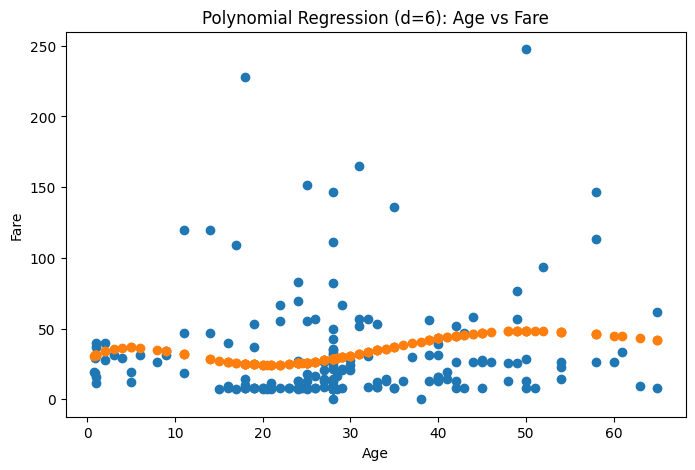

In [10]:
poly6 = PolynomialFeatures(degree=6)
X1_train_poly6 = poly6.fit_transform(X1_train)
X1_test_poly6 = poly6.transform(X1_test)

poly6_model = LinearRegression()
poly6_model.fit(X1_train_poly6, y1_train)
y_pred_poly6 = poly6_model.predict(X1_test_poly6)

report("Polynomial d=6", y1_test, y_pred_poly6)

plt.scatter(X1_test, y1_test)
plt.scatter(X1_test, y_pred_poly6)
plt.title("Polynomial Regression (d=6): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


## Regression Model Performance Summary

| Model                         | Train R²     | Test R²      | Test RMSE | Test MAE  |
|------------------------------|--------------|--------------|-----------|-----------|
| Linear (age)                 | 0.00995      | 0.00342      | 37.9716   | 25.2864   |
| Linear (family_size)         | 0.04992      | 0.02223      | 37.6115   | 25.0253   |
| Linear (age + family_size)   | 0.07347      | 0.04978      | 37.0778   | 24.2849   |
| Linear (pclass + sex + age)  | 0.31513      | 0.35025      | 30.6602   | 20.4773   |
| Ridge (age)                  | —            | 0.0034165    | 37.9716   | 25.2864   |
| Elastic Net (age)            | —            | 0.0034751    | 37.9705   | 25.2840   |
| Polynomial (degree 3)        | —            | -0.003304    | 38.0995   | 25.3039   |
| Polynomial (degree 6)        | —            | 0.0000307    | 38.0361   | 25.1701   |
